# 🧭 Event Alignment Tool
Align implement usage signals with external telemetry (e.g., power, GPS, or engine data) for synchronized analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load implement usage summary
impl_df = pd.read_csv('../data_pipeline/implement_usage_summary.csv')
impl_df['Start'] = pd.to_datetime(impl_df['Start'])
impl_df['Stop'] = pd.to_datetime(impl_df['Stop'])

## 📥 Load External Telemetry (e.g., power, speed, GPS)

In [3]:
# Example telemetry data (replace with actual CSV path)
telemetry = pd.read_csv('../data_pipeline/tractor_telemetry.csv')
telemetry['Timestamp'] = pd.to_datetime(telemetry['Timestamp'])
telemetry = telemetry.set_index('Timestamp')

telemetry.head()

,Engine_Load
Timestamp,
2025-05-30 07:56:12.958842,45.236894
2025-05-30 07:56:42.958842,36.376226
2025-05-30 07:57:12.958842,61.589469
2025-05-30 07:57:42.958842,29.641715
2025-05-30 07:58:12.958842,50.775025


## 🔄 Align Events: Add 'Active' Flags to Telemetry Timeline

In [4]:
telemetry['Implement_Active'] = 0

for _, row in impl_df.iterrows():
    telemetry.loc[row['Start']:row['Stop'], 'Implement_Active'] = 1

telemetry.head()

,Engine_Load,Implement_Active
Timestamp,,
2025-05-30 07:56:12.958842,45.236894,1
2025-05-30 07:56:42.958842,36.376226,1
2025-05-30 07:57:12.958842,61.589469,1
2025-05-30 07:57:42.958842,29.641715,1
2025-05-30 07:58:12.958842,50.775025,1


## 📊 Plot Aligned Events vs External Signal

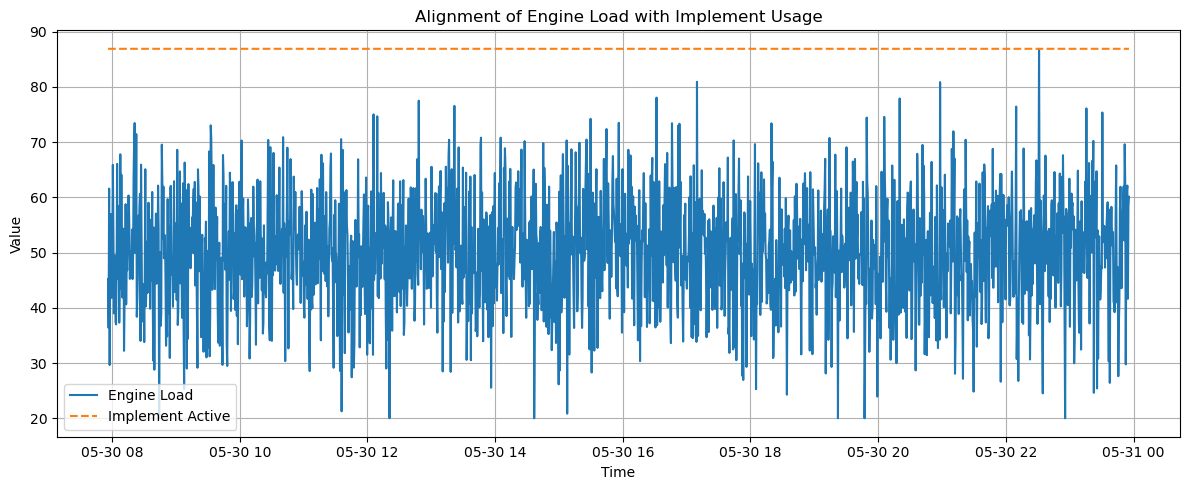

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(telemetry.index, telemetry['Engine_Load'], label='Engine Load')
plt.plot(telemetry.index, telemetry['Implement_Active'] * telemetry['Engine_Load'].max(), label='Implement Active', linestyle='--')
plt.legend()
plt.title('Alignment of Engine Load with Implement Usage')
plt.ylabel('Value')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()